In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0.5, 1.0, 'checking for relation')

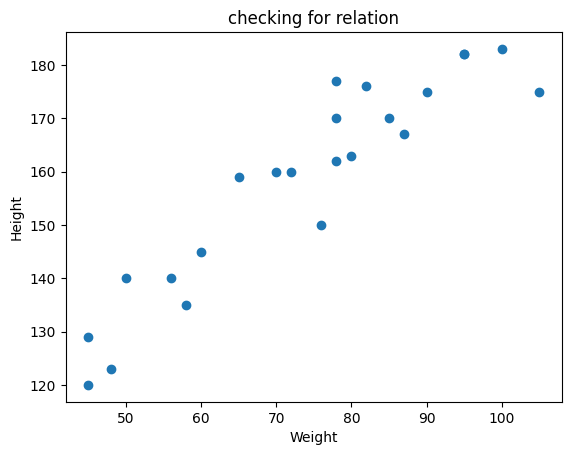

In [10]:
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('checking for relation')

In [11]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [12]:
import seaborn as sns

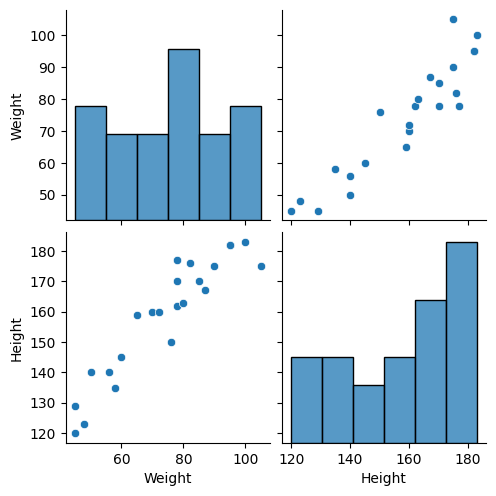

In [13]:
sns.pairplot(df)

In [14]:
#dividing features into dependend and independent features
X=df[['Weight']] # independent feature should be a 2D array or a dataframe



In [15]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [16]:
Y=df['Height'] # the dependent feature can be 1D array or a series

In [19]:
#now we have to do train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
X_train.shape


(17, 1)

In [21]:
X_test.shape

(6, 1)

In [22]:
#Standardisation : sabki units same karni hai 
# mean zero kardega and standard deviation 1 kardega for every value

#z=(x-mean)/std
from sklearn.preprocessing import StandardScaler


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [26]:
#applying simple linear regression
from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression(n_jobs=-1)

In [31]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [32]:
regression.coef_

array([17.2982057])

In [33]:
regression.intercept_


np.float64(156.47058823529412)

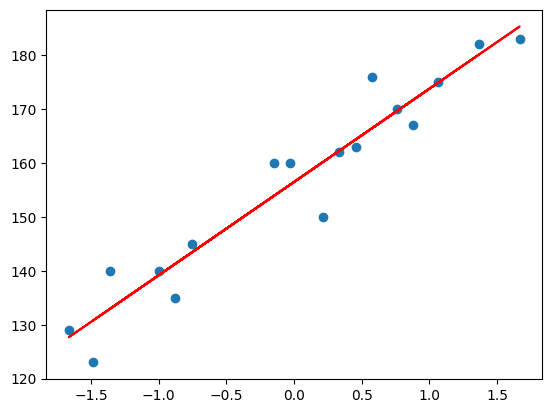

In [37]:
#plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

In [39]:
#prediction for the test data
y_prediction = regression.predict(X_test)

In [40]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [44]:
mae = mean_absolute_error(Y_test,y_prediction)
mse = mean_squared_error(Y_test,y_prediction)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

9.66512588679501
114.84069295228699
10.716374991212605


In [45]:
from sklearn.metrics import r2_score

In [46]:
score = r2_score(Y_test,y_prediction)

In [47]:
print(score)

0.7360826717981276


In [48]:
adjusted_r2 = 1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

In [49]:
print(adjusted_r2)

0.6701033397476595


In [52]:
#prediction for new data
regression.predict(scaler.transform([[72]]))

d:\Machine-Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])